# Training Models

Training a model consists in reducing the value of a specific loss/cost function. There are two ways to train it:
- <b>closed-form: </b> when exists a function that computes the best loss
- <b>Gradient Descent: </b>it's impossible to have a function that minimizes the loss, so the training is done by gradually tweaking the model parameter.

## Regression Model

A regression model is defined by:

$$ \hat{Y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n} $$ 

- $\theta_{j} $: is the model's parameter vector, including the bias term $\theta_{0}$ and the weights $\theta_{1}, \theta_{2}, ... \theta_{n} $
- $x$: is the feature vector
- $x_{n}$: is the feature vector at the $n^{th}$ position
- $ \hat{Y} $ is the predicted value


Training a model means setting up its parameters so the model performs well on the training set. In order to evaluate it's performance (how well or bad it is), we need to use a cost/fit function. Typically, in regressions problems its used a cost function called Root Mean Squared Error (RMSE).
Therefore, training a regression model consists in find the values of $\theta$ so that minimizes the RMSE.

<b>Note: </b> Many cases, the learning algorithm will optimize a different function than the performance measured by the final model, because it's easier to compute. This happens in this example, since RMSE is a squared root, it's easier to compute the Mean Square Error (MSE), and it leads to the same result because the value that minimizes a function also minimizes its squared root. 

The MSE is given by:

$$ MSE(x) = \frac{1}{m}*\sum^{m}_{i=1}(\mathbf{\theta}\cdot\mathbf{x}^{(i)} - y^{(i)})^2 $$

- $\mathbf{\theta}$: is the vector parameters that includes the bias term and the weights
- $\mathbf{x}$: is the features vector that contains $x_{i}$ to $x_{n}$, with $x_{0}$ always equals to 1.
- $\mathbf{\theta}\cdot\mathbf{x}^{(i)}$: is the dot product of $\mathbf{\theta}$ and $\mathbf{x}$ for the $i^{th}$ sample, which is equals to $\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$


### The Normal Equation

A simple linear regression model can be trained using a <i>close-form</i> equation, called <i>Normal Equation</i>:

$$ \hat\theta = (\mathbf{x}^{T}\mathbf{x})^{-1} \mathbf{x}^{T} y $$

- $\hat\theta$: is the value of $\theta$ that minimizes the cost function

Let's apply this into a linear looking data

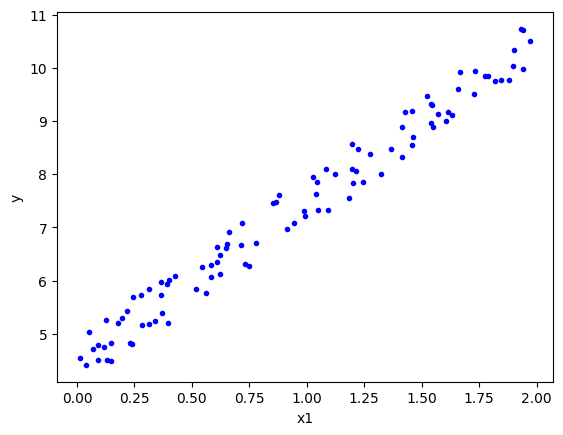

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random state
np.random.seed(42)

# Generate the X and Y data (shape 100x1)
x = 2 * np.random.rand(100, 1) # shape [100x1]
y = 4 + 3 * x + np.random.rand(100, 1)

# plot
plt.plot(x, y, '.b')
plt.xlabel('x1')
plt.ylabel('y')
plt.show() 

In [2]:
# First we need to add x0=1 in all instances
x_b = np.c_[np.ones((100, 1)), x]

# Computing the theta using the normal equation
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print(theta_best)

[[4.51359766]
 [2.98323418]]


We should expect a value of $\theta_{0}=3$ and $\theta_{1}=4$.However, the data has noise making impossible to recover the exact parameters

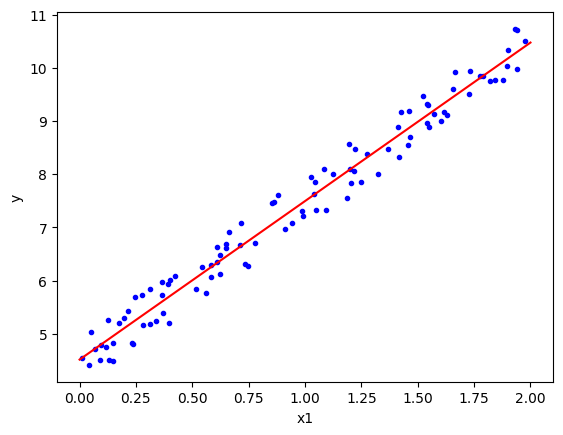

In [3]:
# Now we can can plot the regression line 
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_pred = x_new_b.dot(theta_best)

# plot
plt.plot(x, y, '.b')
plt.plot(x_new, y_pred, '-r')
plt.xlabel('x1')
plt.ylabel('y')
plt.show() 

All these steps can be done using the Sklearn linear regression

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

print(lin_reg.intercept_, lin_reg.coef_)

[4.51359766] [[2.98323418]]


As we can see the values are exactly the same.

### Gradient Descent

The ideia of gradient descent is to tweak parameters iteratively in order to minimize a cost function. It measures the local gradient of the error function with regard the parameter vector $\theta$, and it goes in the direction of descending gradient. Initially we fill $\theta$ with random values (<i>random initialization</i>), and then it improve gradually, taking very small steps at the time (<i>learning rate </i>), converting into a minimum.
<p> The learning rate is the most importante parameter. A low learning rate, the algorithm will have to go through many iterations to converge (very long time). A high LR might overshoot the valley and end up with a even higher error.

To implement the Gradient Descent, we need to calculate the partial derivative of a cost function regarding each parameter $\theta_{j}$. In order words, we need to calculate how much the cost function will change, if we change the $\theta_{j}$ a little  bit.

$$ 
\frac{\partial loss(x)}{\partial \theta_j} = \frac{\partial MSE(x)}{\partial \theta_j} = \\
\frac{\partial}{\partial \theta_j}(\frac{1}{m}*\sum^{m}_{i=1}(\mathbf{\theta}\cdot\mathbf{x}^{(i)} - y^{(i)})^2) = \\
\frac{1}{m}*\sum^{m}_{i=1}\frac{\partial}{\partial \theta_j}(\mathbf{\theta}\cdot\mathbf{x}^{(i)} - y^{(i)})^2 = \\
\frac{2}{m}*\sum^{m}_{i=1}(\mathbf{\theta}\cdot\mathbf{x}^{(i)} - y^{(i)})\frac{\partial}{\partial \theta_j}(\mathbf{\theta}\cdot\mathbf{x}^{(i)} - y^{(i)}) = \\
\frac{2}{m}*\sum^{m}_{i=1}(\mathbf{\theta}\cdot\mathbf{x}^{(i)} - y^{(i)})x
$$

The formula above compute the partial derivatives individually, we can adapt it to compute them all in one go

$$
\nabla_{\theta}MSE(x) = \begin{pmatrix} \frac{\partial MSE(x)}{\partial \theta_1}\\ 
\frac{\partial MSE(x)}{\partial \theta_1}\\ ... \\  \frac{\partial MSE(x)}{\partial \theta_n}\end{pmatrix} = \frac{2}{m}X^T(X\theta - Y)
$$

Once the gradient vector is calculated, we need to go to the opposite to go to downhill. This means subtracting $\nabla_{\theta}MSE(x)$ to $\theta$. This is where the learning rate $\eta$ to determine the size of the step 

$$ \theta^{next} = \theta - \nabla_{\theta}MSE(x) $$

Let's look an example

In [5]:
np.random.seed(42)
eta = 0.1 # Learning rate
n_iterations = 1000
m = len(x_b) # Number of samples

# Initial theta
theta = np.random.randn(2, 1) # Random Initialization 

for iteration in range(n_iterations):
    gradient = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - gradient*eta

print(theta)

[[4.51359766]
 [2.98323418]]


The results are exactly the same than the Normal Equation

In [6]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta):
    m = len(x_b)
    plt.plot(x, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = x_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(x_new, y_predict, style)
        gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
        theta = theta - eta * gradients
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
            


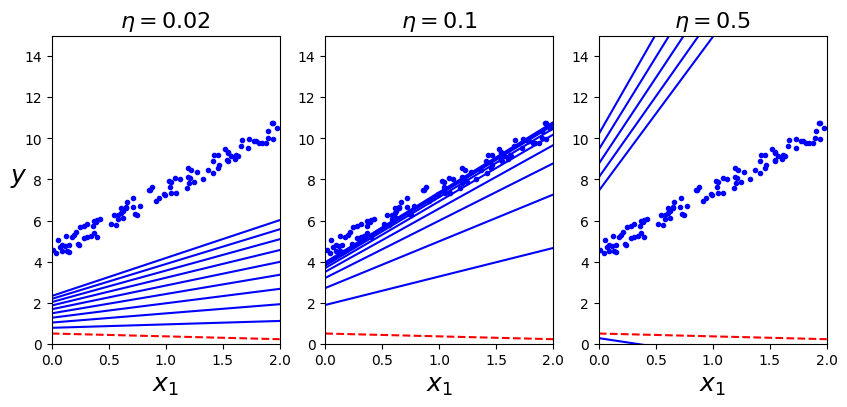

In [7]:
np.random.seed(42)
theta_path_bgd = []
theta = np.random.randn(2, 1) # Random Initialization 

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

### Stochastic Gradient Descent

One disadvantage of Batch Gradient Descent is the fact that it uses the whole dataset to calculate each step, making it very slow for large datasets. The very opposite is the <i>stochastic gradient descent</i> which in every step it randomly choses a unique sample to calculate the gradient. This makes the algorithm much faster since it has less data to process. 
<p> As expected, because of the randomness the descent is less regular than the Batch GD. It has advantages such as being able to pass through local minimums. However the disadvantage is the fact that it never reaches the perfect minimum, because it will bounce around it. So once the algorithm stops, the final parameter values are good, but not optimal.

<p> One solution to this problem is to gradually reduce the learning rate. This is called <i>learning schedule</i>. At the start the LR is high, allowing to jump local minimums and have a landscape of the loss map. Then, the learning rate will decrease, allowing the algorithm to find the global minimum.

<p> If the learning rate is reduced too quickly, it may get stuck into a local minimum or froze the the gradient. In other hand, if the learning rate is reduced too slowly, it may jump around the minimum, ending up with a suboptimal solution. 


Let´s implement this

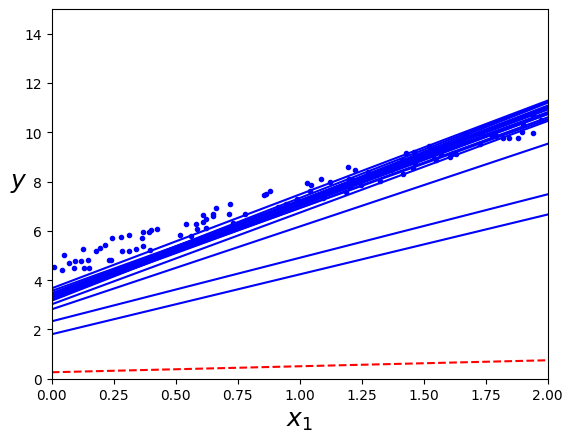

In [35]:
n_epochs = 50
t0, t1 = 5, 50 # learning rate parameters

def learning_schedule(t):
    return t0 / (t + t1)

# Training
etas = []
theta = np.random.rand(2, 1) # Initialize the parameters 
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = x_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(x_new, y_predict, style)   
        # select the random sample
        random_index = np.random.randint(m) 
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        # calculate the gradient
        gradient = 2 / 1 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        etas.append(eta)
        theta = theta - eta*gradient

plt.plot(x, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()    

Text(0, 0.5, 'Learning Rate')

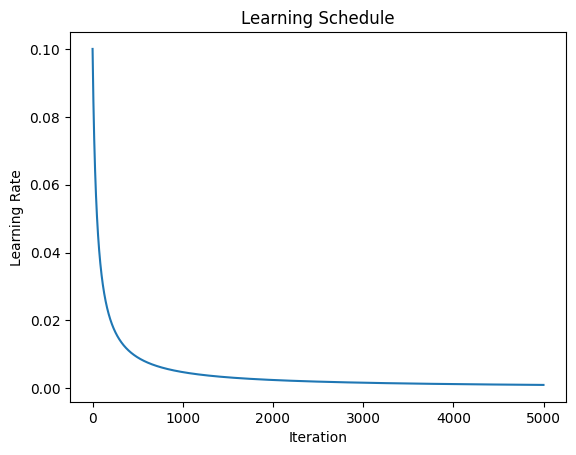

In [26]:
plt.plot(etas)
plt.title('Learning Schedule')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')

One Epoch is when an ENTIRE dataset is passed through the gradient calculation. While the Batch Gradient Descent code iterated 1,000 times through the whole train‐ ing set, this code goes through the training set only 50 times and reaches a fairly good solution

To perform the SGD with Sklearn we can use the SGDRegressor class

In [37]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.4759254] [2.97979414]
